
# Part 3: Data Modelling with FBProphet
<b> FB ==> Facebook<br>
  &nbsp; &nbsp; &nbsp;   +<br>
Prophet ==> Open source software released by Facebook’s Core Data Science team. </b>
<br><br>
Inshort, Facebook's Prophet is a procedure for forecasting time series data based on an additive model where non-linear trends are fit with yearly, weekly, and daily seasonality, plus holiday effects. It works best with time series that have strong seasonal effects and several seasons of historical data. Prophet is robust to missing data and shifts in the trend, and typically handles outliers well.

### The Prophet Forecasting model
***y(t)= g(t) + s(t) + h(t) + εt <br>
g(t): trend component<br>
s(t): seasonality component<br>
h(t): holiday component<br>
εt: error term***
<br><br>
That's all for the brief introduction. Let's work on the model now.

In [1]:
# import required libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline
from fbprophet import Prophet
from sklearn.metrics import mean_squared_error,  mean_absolute_error
import os

Let's first try to fit FBProphet on our daily data. Since, we have multiple pollutants So we'll first work on PM2.5 data

##### Basic Prophet model on daily data of PM2.5.

In [2]:
# loading daily data of PM2.5
train_PM25 = pd.read_csv('dataset/daily/train/train_PM2.5.csv',parse_dates = [0])
test_PM25 = pd.read_csv('dataset/daily/test/test_PM2.5.csv',parse_dates = [0])

In [3]:
# let's print the first five rows of train_PM25
train_PM25.head()

,Date-Time,PM2.5
0,2013-03-01,6.458333
1,2013-03-02,28.750000
2,2013-03-03,104.750000
3,2013-03-04,22.875000
4,2013-03-05,131.833333


It's important to note that the FBProphet model requires data to be in specific format as given below.<br><br>
    <b>1) Data must contain two columns<br>
    2) First one should contain date-time and the column name must be 'ds'<br>
    3) Second one must contain actual data and column name must be 'y'</b>
    
    
 <br>
 Let's format the data accordingly.

In [4]:
# formatting data for FBProphet
train_PM25.columns = ['ds','y']
test_PM25.columns = ['ds','y']

In [5]:
# let's print first five rows of train_PM25 after formating
train_PM25.head()

,ds,y
0,2013-03-01,6.458333
1,2013-03-02,28.750000
2,2013-03-03,104.750000
3,2013-03-04,22.875000
4,2013-03-05,131.833333


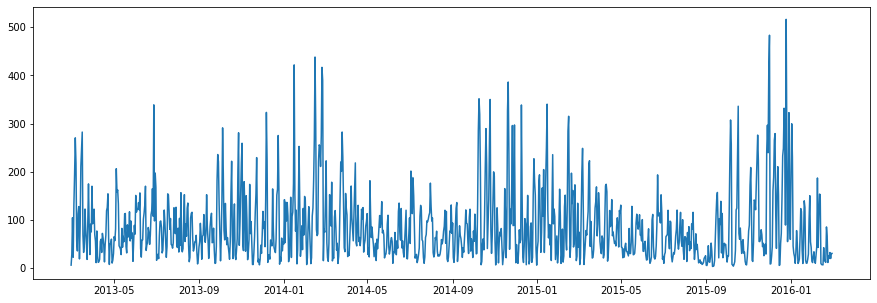

In [6]:
# let's plot our train data
plt.figure(figsize=(15,5))
plt.plot(train_PM25['ds'],train_PM25['y'])

Prophet model takes various parameters like seasonality, holidays, changepoints etc. Let's first try simple model.

In [7]:
# load model
model = Prophet()
# fit model to our train_PM25 data
model.fit(train_PM25)
# specify period and frequency of predictions
# (We need to predict daily data for next one year so period will be 365 and frequency will be 'D')
future = model.make_future_dataframe(periods=365, freq = 'D')
# Predict using the Prophet model
forecast = model.predict(future)
# let's print the forecast
forecast

INFO:fbprophet:Disabling daily seasonality. Run prophet with daily_seasonality=True to override this.


,ds,trend,yhat_lower,yhat_upper,trend_lower,trend_upper,additive_terms,additive_terms_lower,additive_terms_upper,weekly,weekly_lower,weekly_upper,yearly,yearly_lower,yearly_upper,multiplicative_terms,multiplicative_terms_lower,multiplicative_terms_upper,yhat
0,2013-03-01,94.838945,36.317708,216.028073,94.838945,94.838945,26.757653,26.757653,26.757653,5.553349,5.553349,5.553349,21.204304,21.204304,21.204304,0.0,0.0,0.0,121.596598
1,2013-03-02,94.824635,30.887374,213.993205,94.824635,94.824635,28.371459,28.371459,28.371459,8.476449,8.476449,8.476449,19.895011,19.895011,19.895011,0.0,0.0,0.0,123.196094
2,2013-03-03,94.810325,16.338527,198.198793,94.810325,94.810325,19.265833,19.265833,19.265833,0.685655,0.685655,0.685655,18.580178,18.580178,18.580178,0.0,0.0,0.0,114.076158
3,2013-03-04,94.796014,14.052076,197.434896,94.796014,94.796014,11.203794,11.203794,11.203794,-6.080551,-6.080551,-6.080551,17.284345,17.284345,17.284345,0.0,0.0,0.0,105.999809
4,2013-03-05,94.781704,24.674812,202.922367,94.781704,94.781704,15.192289,15.192289,15.192289,-0.837432,-0.837432,-0.837432,16.029721,16.029721,16.029721,0.0,0.0,0.0,109.973993
5,2013-03-06,94.767394,12.022808,193.687453,94.767394,94.767394,8.835046,8.835046,8.835046,-6.000742,-6.000742,-6.000742,14.835788,14.835788,14.835788,0.0,0.0,0.0,103.602439
6,2013-03-07,94.753084,18.895184,199.246971,94.753084,94.753084,11.922261,11.922261,11.922261,-1.796728,-1.796728,-1.796728,13.718989,13.718989,13.718989,0.0,0.0,0.0,106.675345
7,2013-03-08,94.738773,22.438364,203.915185,94.738773,94.738773,18.245853,18.245853,18.245853,5.553349,5.553349,5.553349,12.692504,12.692504,12.692504,0.0,0.0,0.0,112.984627
8,2013-03-09,94.724463,16.101676,199.457162,94.724463,94.724463,20.242556,20.242556,20.242556,8.476449,8.476449,8.476449,11.766107,11.766107,11.766107,0.0,0.0,0.0,114.967019
9,2013-03-10,94.710153,17.946373,191.982259,94.710153,94.710153,11.631778,11.631778,11.631778,0.685655,0.685655,0.685655,10.946123,10.946123,10.946123,0.0,0.0,0.0,106.341931


<b>Note: In the forecast table 'yhat' are the actual predictions. Lets plot the forecast.

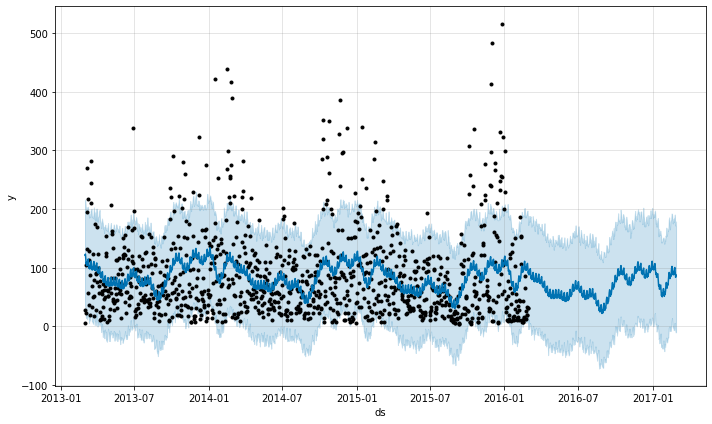

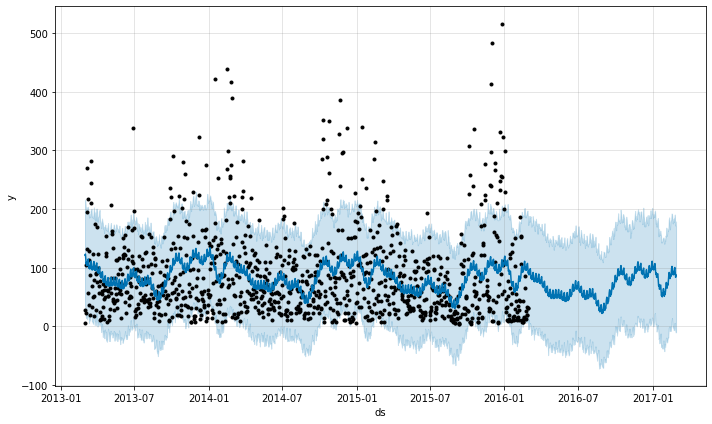

In [8]:
model.plot(forecast)

#### Visualizing the forecast:
-  Black dots are the data points(train data) used to train the model.<br>
-  The blue line in the graph represents the predicted values.<br>
-  Light blue line is the confidence interval<br><br>
As we can see our model didn't fit well with the data. Let's try to evaluate the model<br>

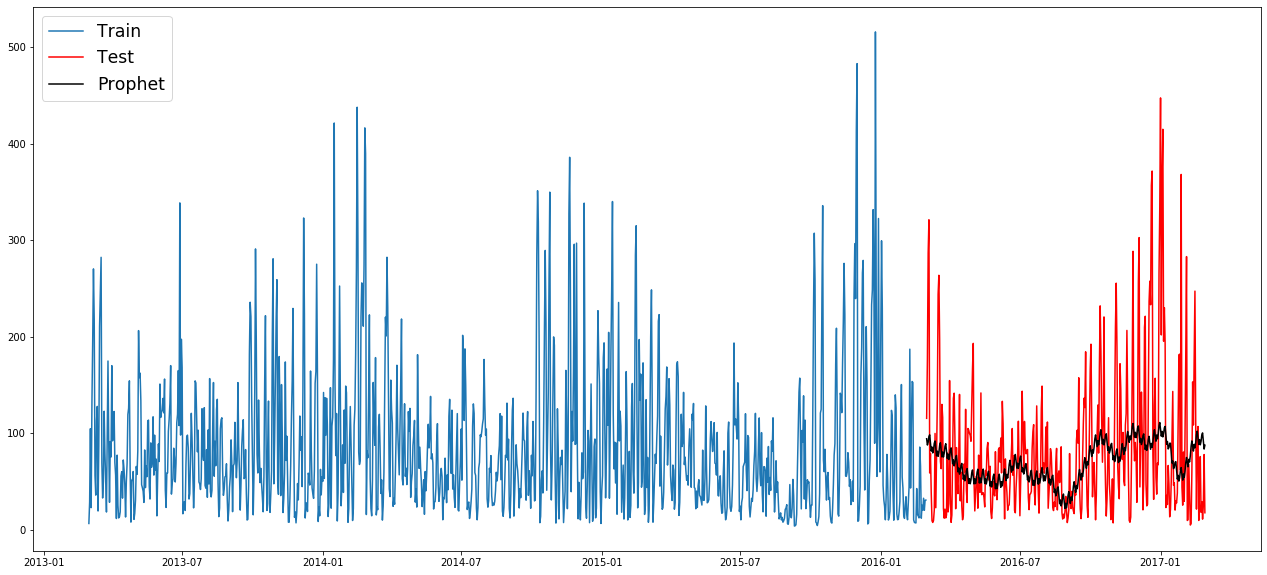

Root mean square error:  72.08367147867312


In [9]:
plt.figure(figsize=(22, 10))
# plot train data
plt.plot(train_PM25['ds'], train_PM25['y'], label='Train')
# plot test data
plt.plot(test_PM25['ds'], test_PM25['y'], label='Test', color='r')
# plot predictions
#   Note: Since We have to evalute last one year forecast, forecast['yhat'][-test_PM25.shape[0]:] gives last one year forecast points
plt.plot(forecast['ds'][-test_PM25.shape[0]:], forecast['yhat'][-test_PM25.shape[0]:], label='Prophet', color='k')
plt.legend(loc='best', fontsize='xx-large')
plt.show()
# calcuate rmse
print('Root mean square error: ',np.sqrt(mean_squared_error(forecast['yhat'][-test_PM25.shape[0]:].reset_index(drop = True), test_PM25['y'])))

##### Tuned Prophet model for yearly seasonality on daily data of PM2.5.

Let's tune the model now. We will try to add seasonality to the model.

INFO:fbprophet:Found custom seasonality named "yearly", disabling built-in yearly seasonality.
INFO:fbprophet:Disabling daily seasonality. Run prophet with daily_seasonality=True to override this.


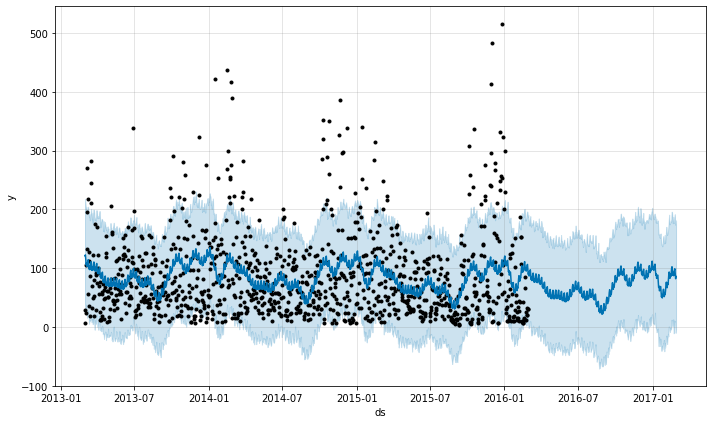

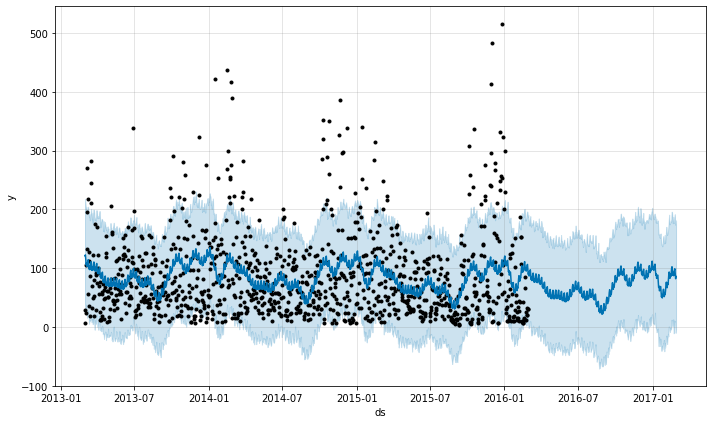

In [10]:
# load model
model = Prophet()
# add yearly seasonality  Note: default fourier_order for yearly seasonality is 10
model.add_seasonality(name='yearly', period=365, fourier_order=10)
model.fit(train_PM25)
future = model.make_future_dataframe(periods=365, freq = 'D')
forecast = model.predict(future)
model.plot(forecast)

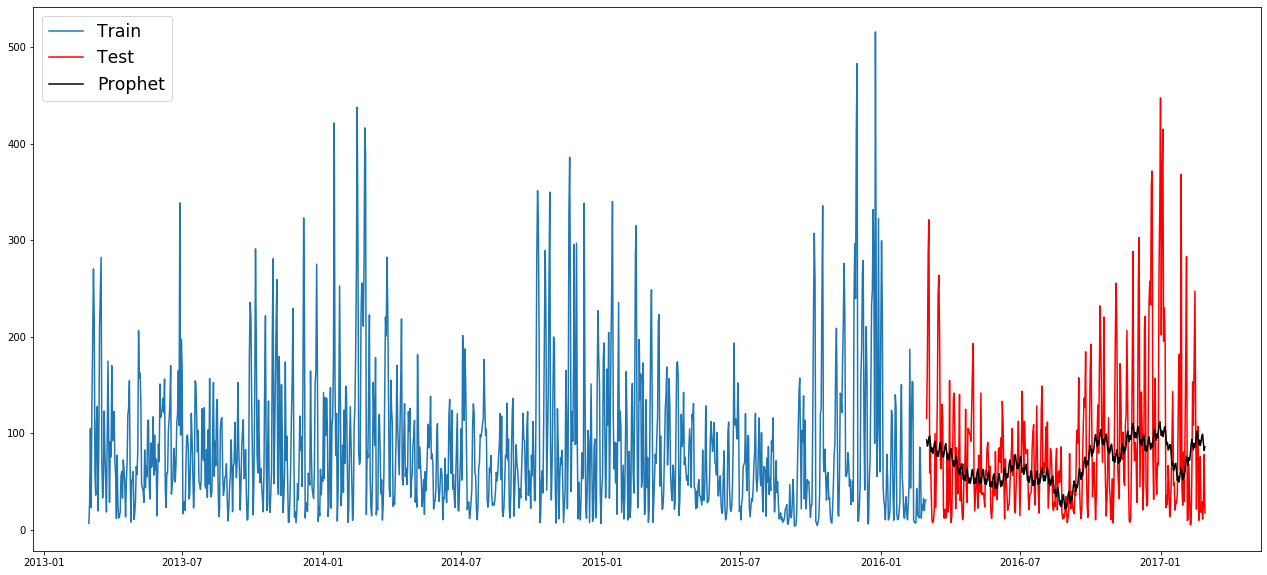

Root mean square error:  72.03057192757619


In [11]:
plt.figure(figsize=(22, 10))
plt.plot(train_PM25['ds'], train_PM25['y'], label='Train')
plt.plot(test_PM25['ds'], test_PM25['y'], label='Test', color='r')
plt.plot(forecast['ds'][-test_PM25.shape[0]:], forecast['yhat'][-test_PM25.shape[0]:], label='Prophet', color='k')
plt.legend(loc='best', fontsize='xx-large')
plt.show()
# calcuate rmse
print('Root mean square error: ',np.sqrt(mean_squared_error(forecast['yhat'][-test_PM25.shape[0]:].reset_index(drop = True), test_PM25['y'])))

##### Basic Prophet model on monthly data of PM2.5.

Still our model was not able to fit well. Let's try Prophet model on monthly data

In [12]:
# loading monthly data of PM2.5
train_PM25 = pd.read_csv('dataset/monthly/train/train_PM2.5.csv',parse_dates = [0])
test_PM25 = pd.read_csv('dataset/monthly/test/test_PM2.5.csv',parse_dates = [0])

In [13]:
# let's print the first five rows of train_PM25
train_PM25.head()

,Date-Time,PM2.5
0,2013-03-01,106.770161
1,2013-04-01,57.350000
2,2013-05-01,77.247312
3,2013-06-01,108.320139
4,2013-07-01,75.435484


In [14]:
# formatting data for FBProphet
train_PM25.columns = ['ds','y']
test_PM25.columns = ['ds','y']

In [15]:
# print first five rows of train_PM25
train_PM25.head()

,ds,y
0,2013-03-01,106.770161
1,2013-04-01,57.350000
2,2013-05-01,77.247312
3,2013-06-01,108.320139
4,2013-07-01,75.435484


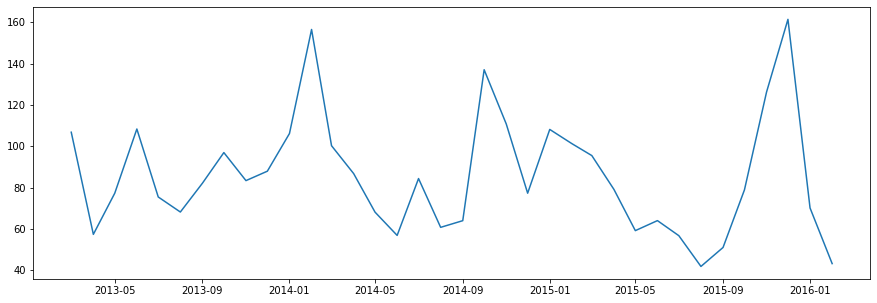

In [16]:
# let's plot our train data
plt.figure(figsize=(15,5))
plt.plot(train_PM25['ds'],train_PM25['y'])

INFO:fbprophet:Disabling weekly seasonality. Run prophet with weekly_seasonality=True to override this.
INFO:fbprophet:Disabling daily seasonality. Run prophet with daily_seasonality=True to override this.


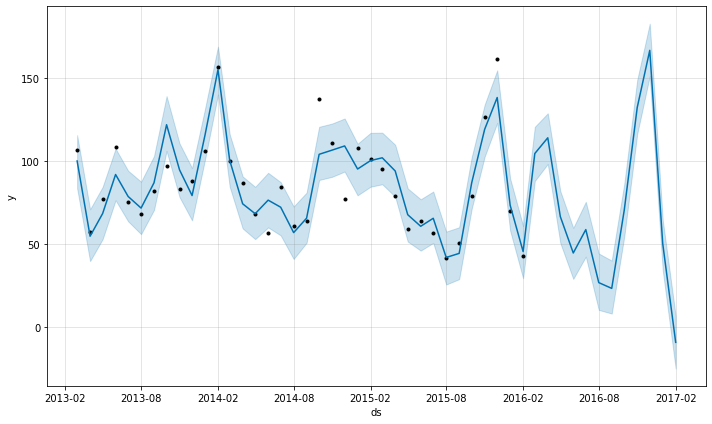

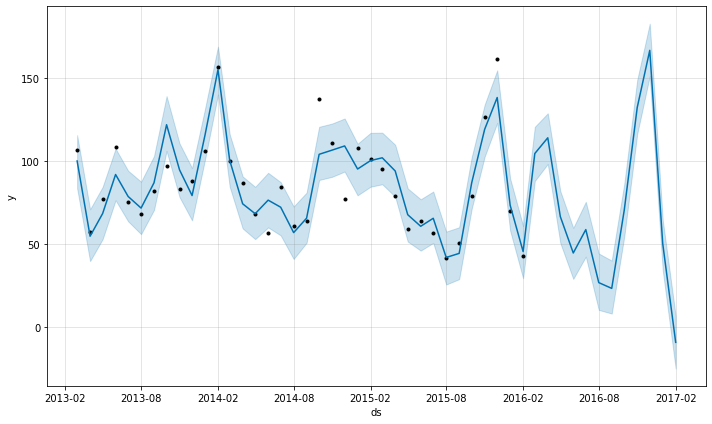

In [17]:
# load model
model = Prophet()
model.fit(train_PM25)
# specify period and frequency of predictions
# (We need to predict monthly data for next one year so period will be 12 and frequency will be 'M')
future = model.make_future_dataframe(periods=12, freq = 'M')
forecast = model.predict(future)
model.plot(forecast)

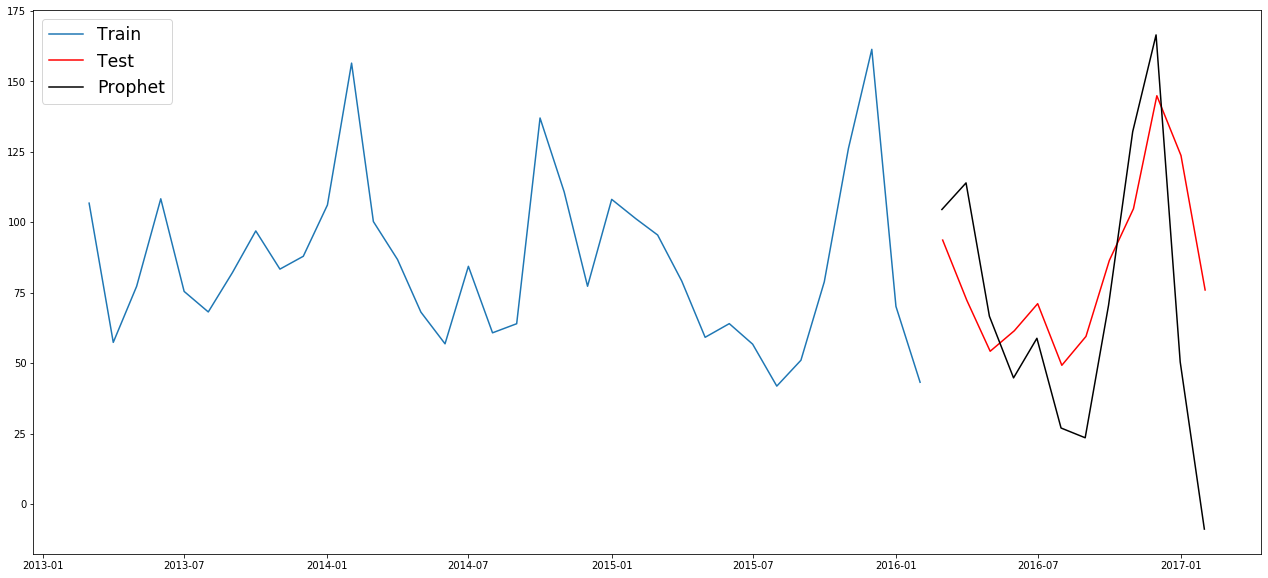

Root mean square error:  39.01807197069059


In [18]:
plt.figure(figsize=(22, 10))
plt.plot(train_PM25['ds'], train_PM25['y'], label='Train')
plt.plot(test_PM25['ds'], test_PM25['y'], label='Test', color='r')
plt.plot(forecast['ds'][-test_PM25.shape[0]:], forecast['yhat'][-test_PM25.shape[0]:], label='Prophet', color='k')
plt.legend(loc='best', fontsize='xx-large')
plt.show()
# calcuate rmse
print('Root mean square error: ',np.sqrt(mean_squared_error(forecast['yhat'][-test_PM25.shape[0]:].reset_index(drop = True), test_PM25['y'])))

As we can see, the basic Prophet model fits decently to the data and we got less RMSE value of 39.01 from monthly data compared to 72.03 from daily data. <br><br>
Let's add seasonality to our model and see how it performs.
##### Tuned Prophet model for yearly seasonality on monthy data of PM2.5.

INFO:fbprophet:Found custom seasonality named "yearly", disabling built-in yearly seasonality.
INFO:fbprophet:Disabling weekly seasonality. Run prophet with weekly_seasonality=True to override this.
INFO:fbprophet:Disabling daily seasonality. Run prophet with daily_seasonality=True to override this.


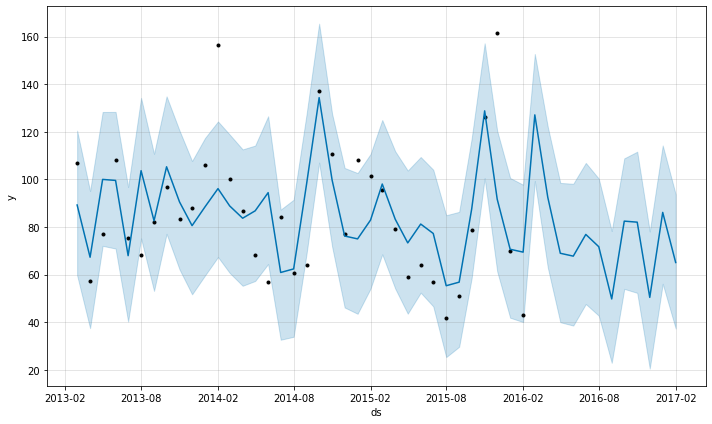

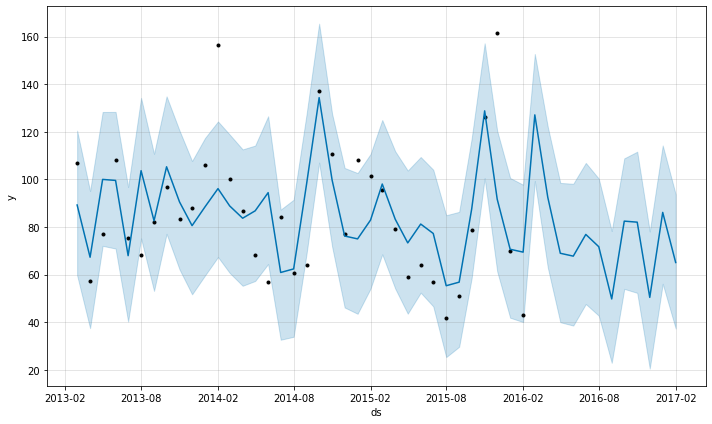

In [19]:
# load model
model = Prophet()
# add yearly seasonality  Note: default fourier_order for yearly seasonality is 10
model.add_seasonality(name='yearly', period=12, fourier_order=10)
model.fit(train_PM25)
future = model.make_future_dataframe(periods=12, freq = 'M')
forecast = model.predict(future)
model.plot(forecast)

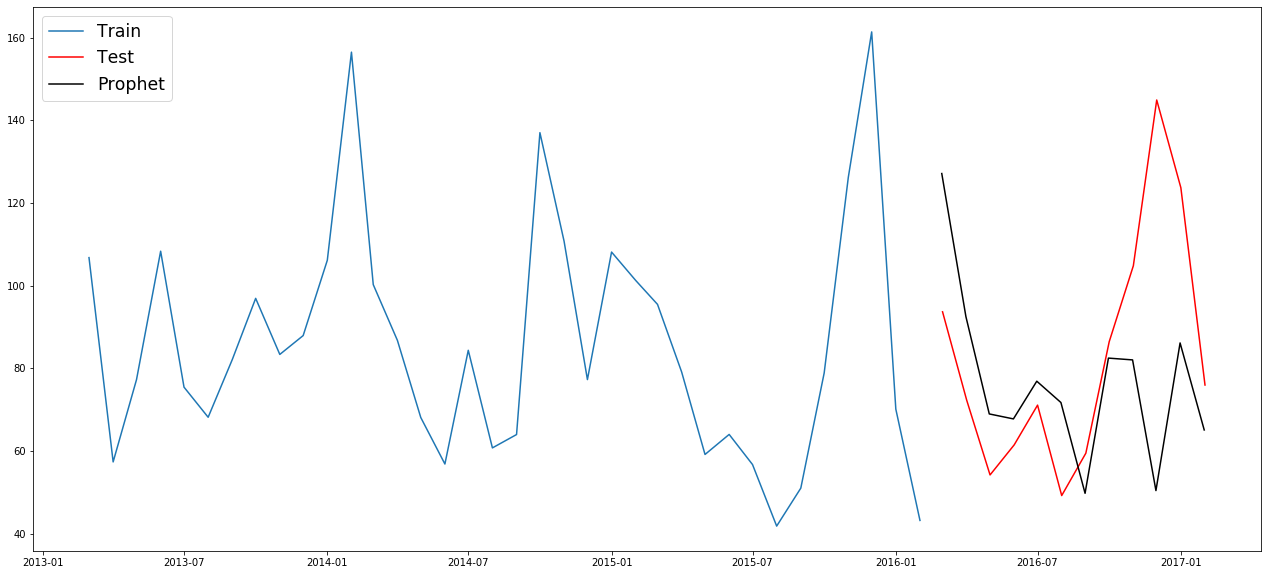

Root mean square error:  33.425948606060764


In [20]:
plt.figure(figsize=(22, 10))
plt.plot(train_PM25['ds'], train_PM25['y'], label='Train')
plt.plot(test_PM25['ds'], test_PM25['y'], label='Test', color='r')
plt.plot(forecast['ds'][-test_PM25.shape[0]:], forecast['yhat'][-test_PM25.shape[0]:], label='Prophet', color='k')
plt.legend(loc='best', fontsize='xx-large')
plt.show()
# calcuate rmse
print('Root mean square error: ',np.sqrt(mean_squared_error(forecast['yhat'][-test_PM25.shape[0]:].reset_index(drop = True), test_PM25['y'])))

We got even less RMSE value of 33.42 but still our model is not performing well. This might be due to small size of monthly data. <br>
Let's try to tune another parameter changepoint_prior_scale which basically allow to tune the  flexibility of the automatic changepoint selection. <br>
***Note: The default value for changepoint_prior_scale is 0.05.***
<br> We'll try to increase it furthur.
<br>
##### Tuned Prophet model for changepoint_prior_scale on monthy data of PM2.5.

INFO:fbprophet:Found custom seasonality named "yearly", disabling built-in yearly seasonality.
INFO:fbprophet:Disabling weekly seasonality. Run prophet with weekly_seasonality=True to override this.
INFO:fbprophet:Disabling daily seasonality. Run prophet with daily_seasonality=True to override this.


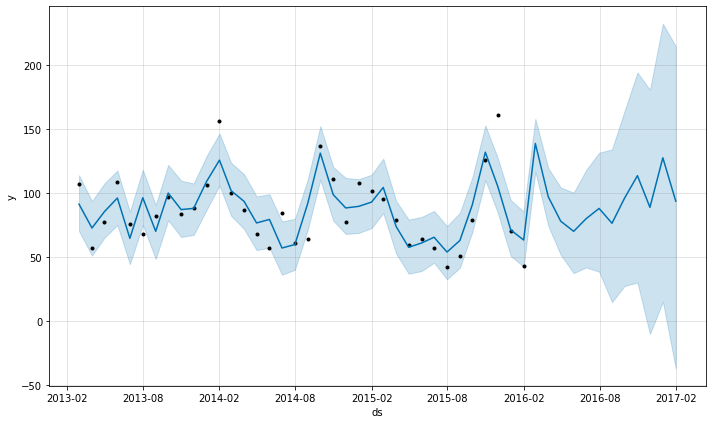

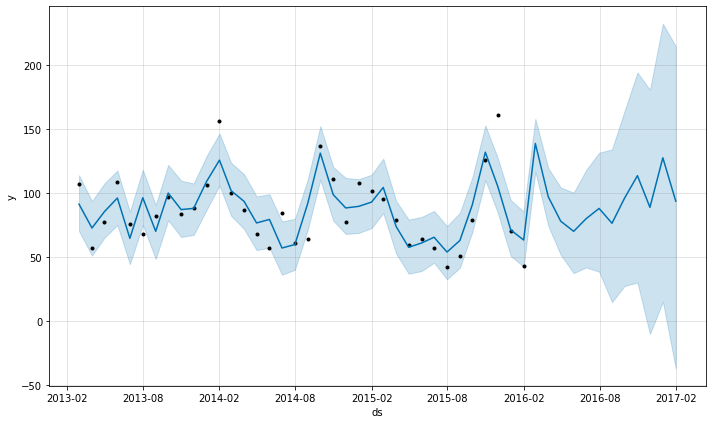

In [21]:
# increase changepoint_prior_scale to 1
model = Prophet(changepoint_prior_scale = 2.5)
# add yearly seasonality  Note: default fourier_order for yearly seasonality is 10
model.add_seasonality(name='yearly', period=12, fourier_order=10)
model.fit(train_PM25)
future = model.make_future_dataframe(periods=12, freq = 'M')
forecast = model.predict(future)
model.plot(forecast)

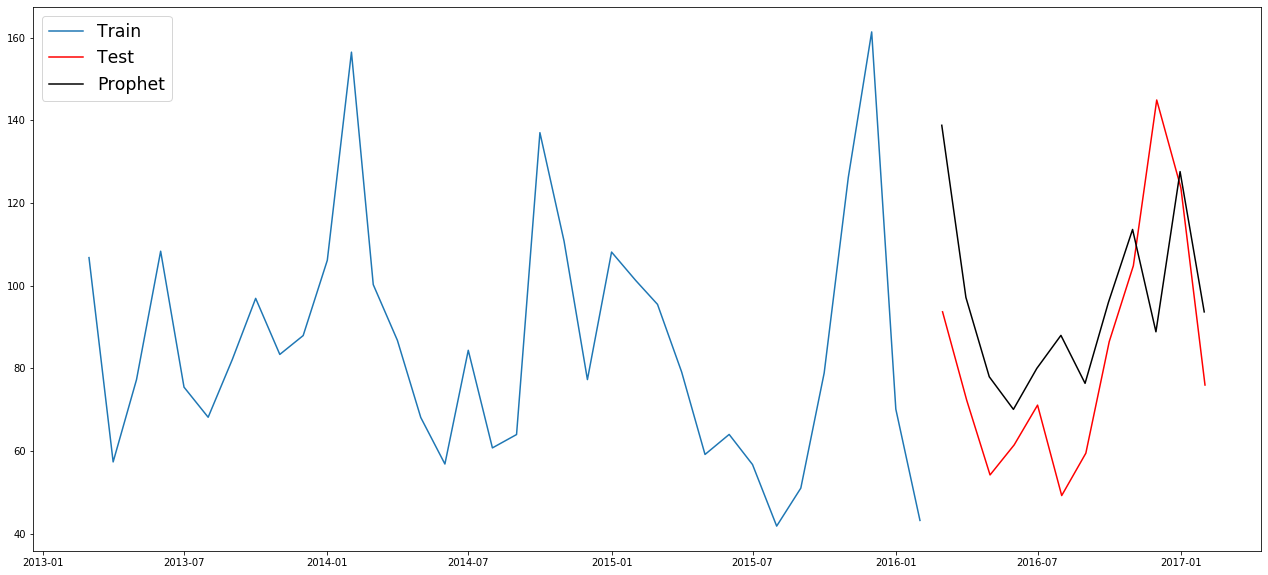

Root mean square error:  27.074990230027023


In [22]:
plt.figure(figsize=(22, 10))
plt.plot(train_PM25['ds'], train_PM25['y'], label='Train')
plt.plot(test_PM25['ds'], test_PM25['y'], label='Test', color='r')
plt.plot(forecast['ds'][-test_PM25.shape[0]:], forecast['yhat'][-test_PM25.shape[0]:], label='Prophet', color='k')
plt.legend(loc='best', fontsize='xx-large')
plt.show()
# calcuate rmse
print('Root mean square error: ',np.sqrt(mean_squared_error(forecast['yhat'][-test_PM25.shape[0]:].reset_index(drop = True), test_PM25['y'])))

After changing changepoint_prior_scale to 2.5 we got RMSE value as 27.07. Let's see how this model performs on rest monthly data of the pollutants.
<br><br>
***Note: Due to time constraints,I am limiting my research on hyperparameter tuning to these two parameters only.***<br>
#### Prophet tuned model on the monthly pollutants data

In [23]:
# load all monthly datasets
train_PM10 = pd.read_csv('dataset/monthly/train/train_PM10.csv', parse_dates = [0])
test_PM10 = pd.read_csv('dataset/monthly/test/test_PM10.csv', parse_dates = [0])
train_SO2 = pd.read_csv('dataset/monthly/train/train_SO2.csv', parse_dates = [0])
test_SO2 = pd.read_csv('dataset/monthly/test/test_SO2.csv', parse_dates = [0])
train_NO2 = pd.read_csv('dataset/monthly/train/train_NO2.csv', parse_dates = [0])
test_NO2 = pd.read_csv('dataset/monthly/test/test_NO2.csv', parse_dates = [0])
train_CO = pd.read_csv('dataset/monthly/train/train_CO.csv', parse_dates = [0])
test_CO = pd.read_csv('dataset/monthly/test/test_CO.csv', parse_dates = [0])
train_O3 = pd.read_csv('dataset/monthly/train/train_O3.csv', parse_dates = [0])
test_O3 = pd.read_csv('dataset/monthly/test/test_O3.csv', parse_dates = [0])

In [24]:
# formatting data for FBProphet
train_PM10.columns = ['ds','y']
test_PM10.columns = ['ds','y']
train_SO2.columns = ['ds','y']
test_SO2.columns = ['ds','y']
train_NO2.columns = ['ds','y']
test_NO2.columns = ['ds','y']
train_CO.columns = ['ds','y']
test_CO.columns = ['ds','y']
train_O3.columns = ['ds','y']
test_O3.columns = ['ds','y']

In [25]:
# create list of all train-sets
list_train = [train_PM10, train_SO2, train_NO2, train_CO, train_O3]
# create list of all test-sets
list_test = [test_PM10, test_SO2, test_NO2, test_CO, test_O3]

forecast plot for PM2.5


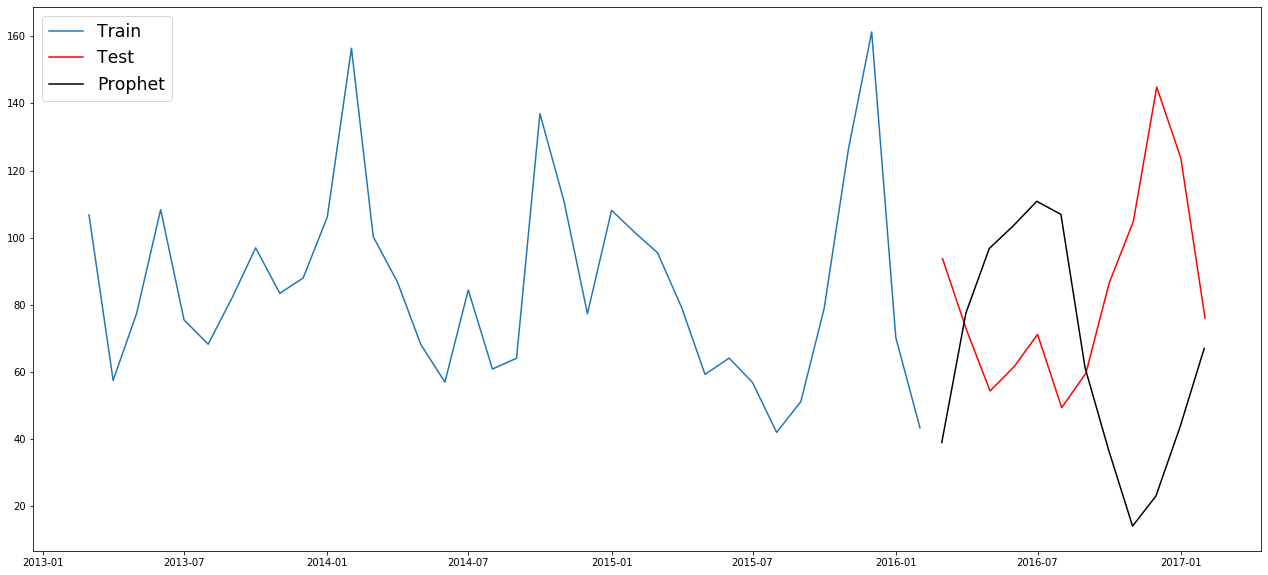

INFO:fbprophet:Disabling weekly seasonality. Run prophet with weekly_seasonality=True to override this.
INFO:fbprophet:Disabling daily seasonality. Run prophet with daily_seasonality=True to override this.


The Mean Squared Error of PM2.5 forecasts is 3639.4098
The Mean Absolute Error of PM2.5 forecasts is 49.6366
The Root Mean Squared Error of PM2.5 forecasts is 60.3275

Results for PM2.5 successfully saved to result/prophet.csv

forecast plot for  PM10


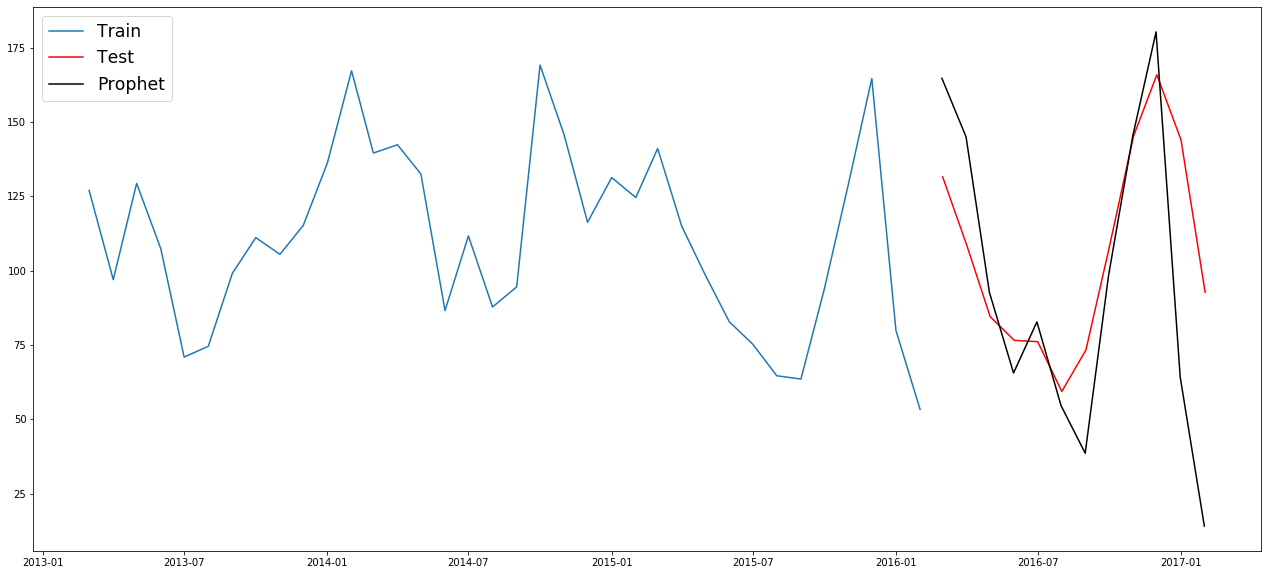

INFO:fbprophet:Disabling weekly seasonality. Run prophet with weekly_seasonality=True to override this.
INFO:fbprophet:Disabling daily seasonality. Run prophet with daily_seasonality=True to override this.


The Mean Squared Error of PM10 forecasts is 1393.6985
The Mean Absolute Error of PM10 forecasts is 26.4389
The Root Mean Squared Error of PM10 forecasts is 37.3323

Results for PM10 successfully saved to result/prophet.csv

forecast plot for  SO2


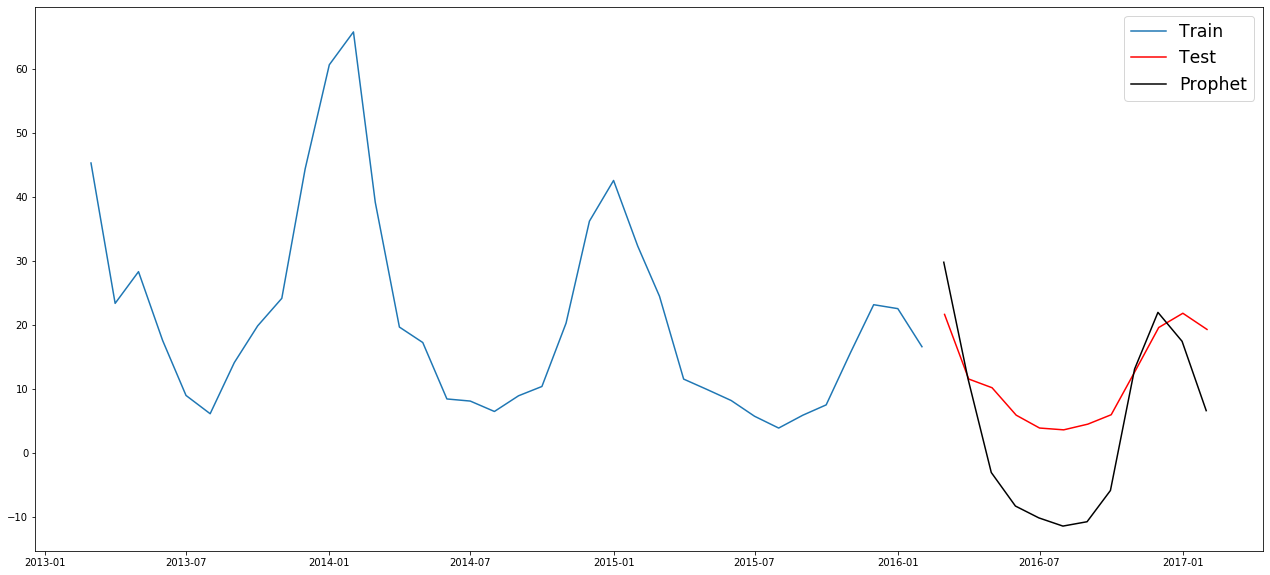

INFO:fbprophet:Disabling weekly seasonality. Run prophet with weekly_seasonality=True to override this.
INFO:fbprophet:Disabling daily seasonality. Run prophet with daily_seasonality=True to override this.


The Mean Squared Error of SO2 forecasts is 118.7185
The Mean Absolute Error of SO2 forecasts is 9.2936
The Root Mean Squared Error of SO2 forecasts is 10.8958

Results for SO2 successfully saved to result/prophet.csv

forecast plot for  NO2


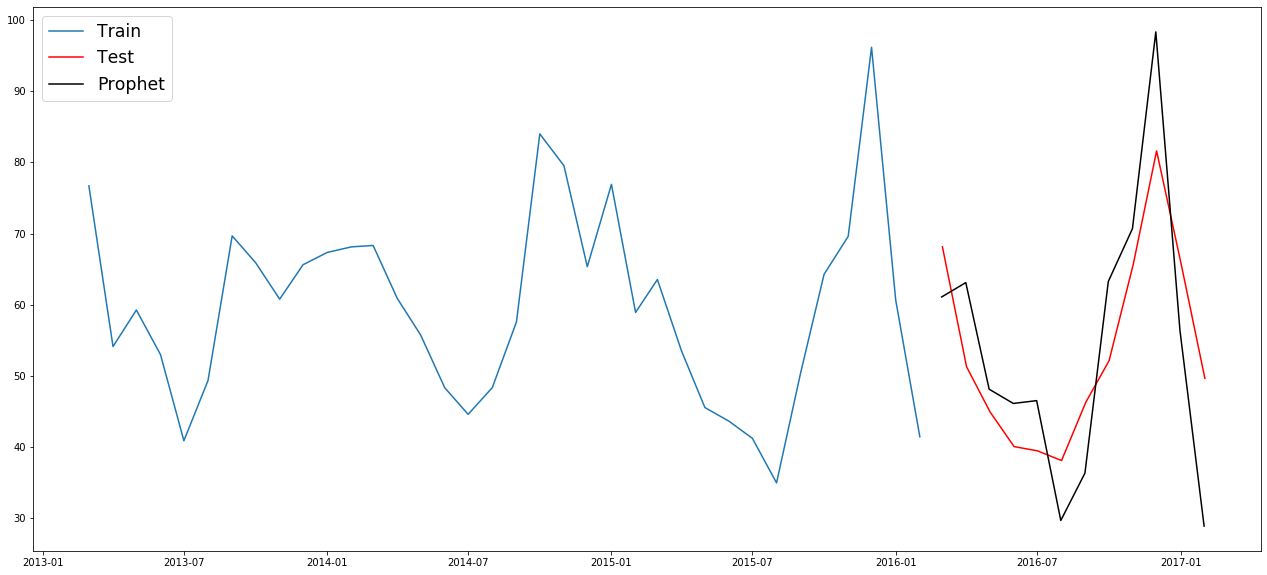

INFO:fbprophet:Disabling weekly seasonality. Run prophet with weekly_seasonality=True to override this.
INFO:fbprophet:Disabling daily seasonality. Run prophet with daily_seasonality=True to override this.


The Mean Squared Error of NO2 forecasts is 117.6427
The Mean Absolute Error of NO2 forecasts is 9.7433
The Root Mean Squared Error of NO2 forecasts is 10.8463

Results for NO2 successfully saved to result/prophet.csv

forecast plot for  CO


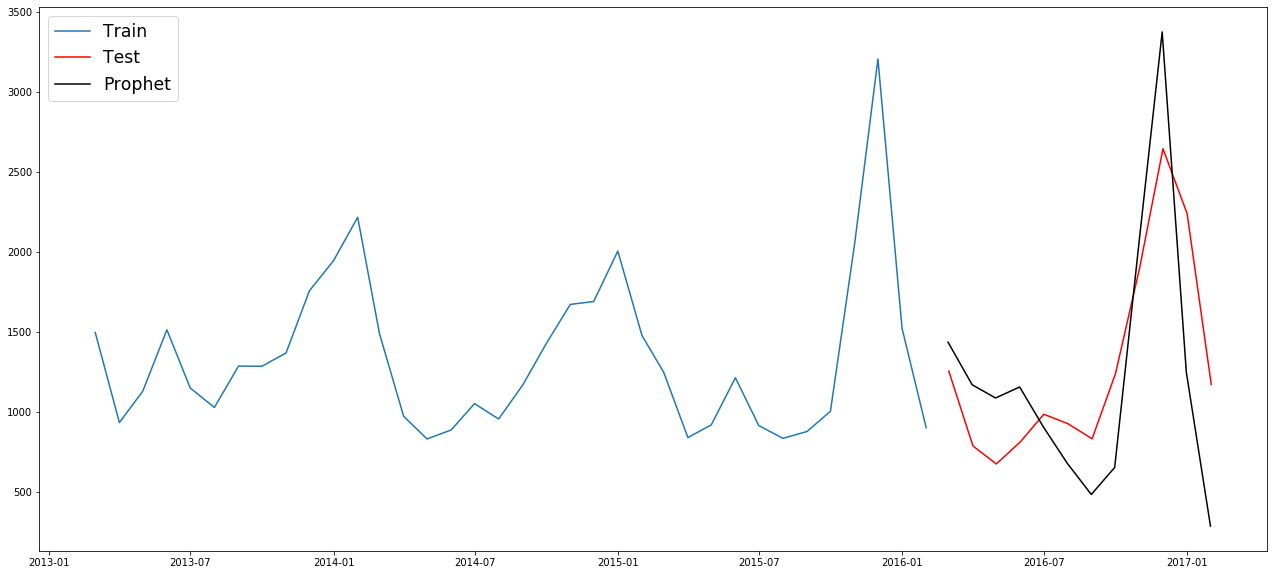

INFO:fbprophet:Disabling weekly seasonality. Run prophet with weekly_seasonality=True to override this.
INFO:fbprophet:Disabling daily seasonality. Run prophet with daily_seasonality=True to override this.


The Mean Squared Error of CO forecasts is 276937.4953
The Mean Absolute Error of CO forecasts is 444.4292
The Root Mean Squared Error of CO forecasts is 526.2485

Results for CO successfully saved to result/prophet.csv

forecast plot for  O3


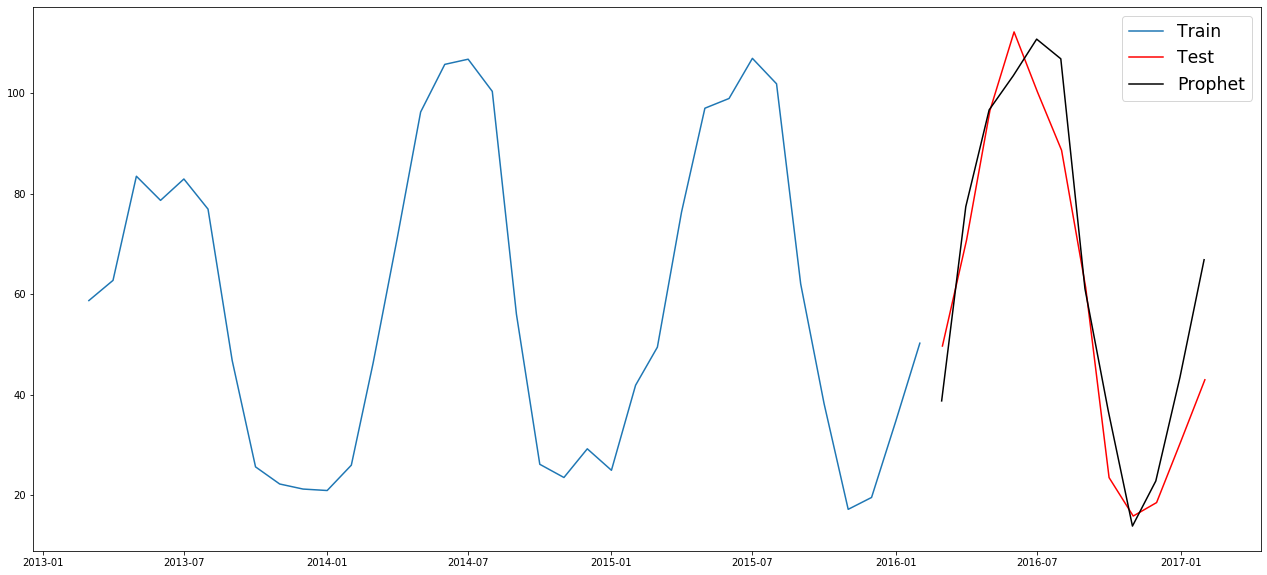

The Mean Squared Error of O3 forecasts is 134.6083
The Mean Absolute Error of O3 forecasts is 9.2992
The Root Mean Squared Error of O3 forecasts is 11.6021

Results for O3 successfully saved to result/prophet.csv


In [28]:
# plot previous results of PM2.5 explicitly just for comparison
print('forecast plot for PM2.5')
plt.figure(figsize=(22, 10))
plt.plot(train_PM25['ds'], train_PM25['y'], label='Train')
plt.plot(test_PM25['ds'], test_PM25['y'], label='Test', color='r')
plt.plot(forecast['ds'][-test_PM25.shape[0]:], forecast['yhat'][-test_PM25.shape[0]:], label='Prophet', color='k')
plt.legend(loc='best', fontsize='xx-large')
plt.show()
# model evaluation for PM2.5
mse = mean_squared_error(test_PM25['y'], forecast['yhat'][-test_PM25.shape[0]:].reset_index(drop = True))
mae = mean_absolute_error(test_PM25['y'], forecast['yhat'][-test_PM25.shape[0]:].reset_index(drop = True))
# print results for PM2.5
print('The Mean Squared Error of PM2.5 forecasts is {}'.format(round(mse, 4)))
print('The Mean Absolute Error of PM2.5 forecasts is {}'.format(round(mae, 4)))
print('The Root Mean Squared Error of PM2.5 forecasts is {}'.format(round(np.sqrt(mse), 4)))

# save results for PM2.5 locally
if not os.path.exists('result'): os.mkdir('result')
if not os.path.exists('result/prophet.csv'):
    # create result dataframe for storing evaluation results(initialized with zeros)
    pd.DataFrame(data = {'EM' : ['mse','mae','rmse'] , 'PM2.5': [0.0,0.0,0.0], 'PM10': [0.0,0.0,0.0],
                                  'SO2': [0.0,0.0,0.0], 'NO2': [0.0,0.0,0.0],
                                  'CO': [0.0,0.0,0.0], 'O3': [0.0,0.0,0.0],

                        }).to_csv('result/prophet.csv',index = False)
# read the lstm.csv file
result = pd.read_csv('result/prophet.csv', dtype = {'EM':str})
# set index as EM (Evaluation Matrix)
result.set_index('EM', inplace = True)
# write all the results
result['PM2.5']['mse'] = round(mse, 4)
result['PM2.5']['mae'] = round(mae, 4)
result['PM2.5']['rmse'] = round(np.sqrt(mse), 4)

# display successfull write message
print('\nResults for PM2.5 successfully saved to result/prophet.csv')


# Evaluation for rest of the pollutants
# store names of all pollutants
pol_name = ['PM10', 'SO2', 'NO2', 'CO', 'O3']

# fit model to all the monthly data of pollutants
for i in range(len(list_train)):
    print('\nforecast plot for ', pol_name[i])
    # fit each pollutant data to model
    #  Note: We will be using the basic phrophet model as the previously tuned model was tuned w.r.t PM2.5 data and may not work on different dataset
    model = Prophet()
    model.fit(list_train[i])
    # predict data for each pollutant
    future = model.make_future_dataframe(periods=12, freq = 'M')
    forecast = model.predict(future)
    # plot each predictions
    plt.figure(figsize=(22, 10))
    plt.plot(list_train[i]['ds'], list_train[i]['y'], label='Train')
    plt.plot(list_test[i]['ds'], list_test[i]['y'], label='Test', color='r')
    plt.plot(forecast['ds'][-list_test[i].shape[0]:], forecast['yhat'][-list_test[i].shape[0]:], label='Prophet', color='k')
    plt.legend(loc='best', fontsize='xx-large')
    plt.show()
    
    # model evaluation
    actual = list_test[i]['y']
    pred = forecast['yhat'][-list_test[i].shape[0]:].reset_index(drop = True)
    
    # calcuate mean square error
    mse = mean_squared_error(actual, pred)
    # calculate mean absolute error
    mae = mean_absolute_error(actual, pred)
    # print results
    print('The Mean Squared Error of {} forecasts is {}'.format(pol_name[i],round(mse, 4)))
    print('The Mean Absolute Error of {} forecasts is {}'.format(pol_name[i],round(mae, 4)))
    print('The Root Mean Squared Error of {} forecasts is {}'.format(pol_name[i], round(np.sqrt(mse), 4)))
    
    # write all the results
    result[pol_name[i]]['mse'] = round(mse, 4)
    result[pol_name[i]]['mae'] = round(mae, 4)
    result[pol_name[i]]['rmse'] = round(np.sqrt(mse), 4)
    
    # display successfull write message
    print('\nResults for {} successfully saved to result/prophet.csv'.format(pol_name[i]))
    
# save the file after writing
result.to_csv('result/prophet.csv')
    

Clearly, the results were not up to the mark. Some more hyperparameter tuning parameter tuning is required. But due to time constraints we will leave the model here and move to the next part, Part 4: Data Modeling with Holt-Winter.